## Importation

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Feature engineering
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from xgboost import XGBRegressor  

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Time series-specific models
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Other utilities
from datetime import datetime
import os
import joblib


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
train = pd.read_csv('../Assets/train.csv')

### Data Understanding

In [3]:
# Inspect unique values of the 'date' column
print(train['date'].unique())

[ 365  366  367 ... 1624 1625 1626]


In [4]:
train

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
0,365,store_1,category_24,0.000,0,0.0
1,365,store_1,category_21,0.000,0,0.0
2,365,store_1,category_32,0.000,0,0.0
3,365,store_1,category_18,0.000,0,0.0
4,365,store_1,category_26,0.000,0,0.0
...,...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0,2141.0
2248880,1626,store_9,category_20,84.177,0,2141.0
2248881,1626,store_9,category_15,1973.760,3,2141.0
2248882,1626,store_9,category_29,2.000,0,2141.0


In [5]:
train.shape

(2248884, 6)

In [6]:
train.info

<bound method DataFrame.info of          date store_id  category_id    target  onpromotion  \
0         365  store_1  category_24     0.000            0   
1         365  store_1  category_21     0.000            0   
2         365  store_1  category_32     0.000            0   
3         365  store_1  category_18     0.000            0   
4         365  store_1  category_26     0.000            0   
...       ...      ...          ...       ...          ...   
2248879  1626  store_9  category_23   539.725            0   
2248880  1626  store_9  category_20    84.177            0   
2248881  1626  store_9  category_15  1973.760            3   
2248882  1626  store_9  category_29     2.000            0   
2248883  1626  store_9  category_10    27.076            0   

         nbr_of_transactions  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
...                      ...  
224887

In [7]:
train.isna().sum()

date                   0
store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
dtype: int64

In [8]:
print(f'Columns Names: {list(train.columns)}')

Columns Names: ['date', 'store_id', 'category_id', 'target', 'onpromotion', 'nbr_of_transactions']


In [9]:
# Inspect unique values of the 'date' column
print(train['date'].unique())

[ 365  366  367 ... 1624 1625 1626]


In [10]:
test = pd.read_csv('../Assets/test.csv')

In [11]:
test

,date,store_id,category_id,onpromotion
0,1627,store_1,category_24,0
1,1627,store_1,category_21,0
2,1627,store_1,category_32,0
3,1627,store_1,category_18,16
4,1627,store_1,category_26,0
...,...,...,...,...
99787,1682,store_9,category_23,0
99788,1682,store_9,category_20,1
99789,1682,store_9,category_15,7
99790,1682,store_9,category_29,8


In [12]:
test.isna().sum()

date           0
store_id       0
category_id    0
onpromotion    0
dtype: int64

In [13]:
print(f'Columns Names: {list(test.columns)}')

Columns Names: ['date', 'store_id', 'category_id', 'onpromotion']


In [14]:
str = pd.read_csv('../Assets/stores.csv')

In [15]:
str.head()

,store_id,city,type,cluster
0,store_1,0,0,0
1,store_2,0,0,0
2,store_3,0,0,1
3,store_4,0,0,2
4,store_5,1,0,3


In [16]:
str.info

<bound method DataFrame.info of     store_id  city  type  cluster
0    store_1     0     0        0
1    store_2     0     0        0
2    store_3     0     0        1
3    store_4     0     0        2
4    store_5     1     0        3
5    store_6     0     0        0
6    store_7     0     0        1
7    store_8     0     0        1
8    store_9     0     1        4
9   store_10     0     2        5
10  store_11     2     1        4
11  store_12     3     2        5
12  store_13     3     2        5
13  store_14     4     2        6
14  store_15     5     2        5
15  store_16     1     2        7
16  store_17     0     2        8
17  store_18     0     1        9
18  store_19     6     2        5
19  store_20     0     1        4
20  store_21     1     1        4
21  store_22     7     2        6
22  store_23     8     0        2
23  store_24     9     0       10
24  store_25    10     0       10
25  store_26     9     0       11
26  store_27    11     0       10
27  store_28    

In [17]:
print(f'Columns Names: {list(str.columns)}')

Columns Names: ['store_id', 'city', 'type', 'cluster']


In [18]:
str.shape

(54, 4)

In [19]:
dates = pd.read_csv('../Assets/dates.csv')

In [20]:
dates.head()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,1,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,1,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,1,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,1,1,5,6,5,1,1,False,False,False,False,False,False,101


In [21]:
print(f'Columns Names: {list(dates.columns)}')

Columns Names: ['date', 'year', 'month', 'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end', 'year_weekofyear']


In [22]:
dates.isna().sum()

date                0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
dtype: int64

In [23]:
holiday= pd.read_csv('../Assets/holidays.csv')

In [24]:
holiday.head()

,date,type
0,1,0
1,5,4
2,12,4
3,42,0
4,43,0


In [25]:
print(f'Columns Names: {list(holiday.columns)}')

Columns Names: ['date', 'type']


In [26]:
holiday.isna().sum()

date    0
type    0
dtype: int64

In [27]:
samp=pd.read_csv('../Assets/SampleSubmission.csv')

In [28]:
samp

,ID,target
0,year_week_425_store_1_category_0,0
1,year_week_426_store_1_category_0,0
2,year_week_427_store_1_category_0,1
3,year_week_428_store_1_category_0,3
4,year_week_429_store_1_category_0,2
...,...,...
14251,year_week_428_store_9_category_9,0
14252,year_week_429_store_9_category_9,1
14253,year_week_430_store_9_category_9,0
14254,year_week_431_store_9_category_9,1


In [29]:
# Convert 'date' column to datetime format for each dataset
# train['date'] = pd.to_datetime(train['date'])
# test['date'] = pd.to_datetime(test['date'])
# dates['date'] = pd.to_datetime(dates['date'])
# holiday['date'] = pd.to_datetime(holiday['date'])

# Convert 'date' column to datetime format for each dataset
train['date'] = pd.to_datetime(train['date'], unit='D', origin='1970-01-01')
test['date'] = pd.to_datetime(test['date'], unit='D', origin='1970-01-01')
dates['date'] = pd.to_datetime(dates['date'], unit='D', origin='1970-01-01')
holiday['date'] = pd.to_datetime(holiday['date'], unit='D', origin='1970-01-01')


# Merge datasets based on 'store_id' and 'date'
train_merged = pd.merge(train, str, on='store_id', how='left')
test_merged = pd.merge(test, str, on='store_id', how='left')

# Merge with dates dataset to incorporate date-related features
train_merged = pd.merge(train_merged, dates, on='date', how='left')
test_merged = pd.merge(test_merged, dates, on='date', how='left')

# Merge with holidays dataset to incorporate holiday information
train_merged = pd.merge(train_merged, holiday, on='date', how='left')
test_merged = pd.merge(test_merged, holiday, on='date', how='left')


In [30]:
train_merged.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type_x,cluster,year,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type_y
0,1971-01-01,store_1,category_24,0.0,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
1,1971-01-01,store_1,category_21,0.0,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
2,1971-01-01,store_1,category_32,0.0,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
3,1971-01-01,store_1,category_18,0.0,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
4,1971-01-01,store_1,category_26,0.0,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0


In [31]:
train_merged.isna().sum()

date                         0
store_id                     0
category_id                  0
target                       0
onpromotion                  0
nbr_of_transactions          0
city                         0
type_x                       0
cluster                      0
year                         0
month                        0
dayofmonth                   0
dayofweek                    0
dayofyear                    0
weekofyear                   0
quarter                      0
is_month_start               0
is_month_end                 0
is_quarter_start             0
is_quarter_end               0
is_year_start                0
is_year_end                  0
year_weekofyear              0
type_y                 1899612
dtype: int64

In [32]:
# Check the 'date' column in merged_train_data
print(train_merged['date'])

0         1971-01-01
1         1971-01-01
2         1971-01-01
3         1971-01-01
4         1971-01-01
             ...    
2288083   1974-06-15
2288084   1974-06-15
2288085   1974-06-15
2288086   1974-06-15
2288087   1974-06-15
Name: date, Length: 2288088, dtype: datetime64[ns]


In [33]:
# Inspect unique values of the 'date' column
print(train_merged['date'].unique())

<DatetimeArray>
['1971-01-01 00:00:00', '1971-01-02 00:00:00', '1971-01-03 00:00:00',
 '1971-01-04 00:00:00', '1971-01-05 00:00:00', '1971-01-06 00:00:00',
 '1971-01-07 00:00:00', '1971-01-08 00:00:00', '1971-01-09 00:00:00',
 '1971-01-10 00:00:00',
 ...
 '1974-06-06 00:00:00', '1974-06-07 00:00:00', '1974-06-08 00:00:00',
 '1974-06-09 00:00:00', '1974-06-10 00:00:00', '1974-06-11 00:00:00',
 '1974-06-12 00:00:00', '1974-06-13 00:00:00', '1974-06-14 00:00:00',
 '1974-06-15 00:00:00']
Length: 1262, dtype: datetime64[ns]


In [34]:
# Rename the 'target' column to 'sales' in the train_merged dataframe
train_merged.rename(columns={'target': 'sales'}, inplace=True)

In [35]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288088 entries, 0 to 2288087
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   store_id             object        
 2   category_id          object        
 3   sales                float64       
 4   onpromotion          int64         
 5   nbr_of_transactions  float64       
 6   city                 int64         
 7   type_x               int64         
 8   cluster              int64         
 9   year                 int64         
 10  month                int64         
 11  dayofmonth           int64         
 12  dayofweek            int64         
 13  dayofyear            int64         
 14  weekofyear           int64         
 15  quarter              int64         
 16  is_month_start       bool          
 17  is_month_end         bool          
 18  is_quarter_start     bool          
 19  is_quarter_end       

In [36]:
test_merged.head()

,date,store_id,category_id,onpromotion,city,type_x,cluster,year,month,dayofmonth,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type_y
0,1974-06-16,store_1,category_24,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
1,1974-06-16,store_1,category_21,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
2,1974-06-16,store_1,category_32,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
3,1974-06-16,store_1,category_18,16,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN
4,1974-06-16,store_1,category_26,0,0,0,0,4,6,19,...,25,2,False,False,False,False,False,False,425,NaN


In [37]:
# Inspect unique values of the 'date' column
print(test_merged['date'].unique())

<DatetimeArray>
['1974-06-16 00:00:00', '1974-06-17 00:00:00', '1974-06-18 00:00:00',
 '1974-06-19 00:00:00', '1974-06-20 00:00:00', '1974-06-21 00:00:00',
 '1974-06-22 00:00:00', '1974-06-23 00:00:00', '1974-06-24 00:00:00',
 '1974-06-25 00:00:00', '1974-06-26 00:00:00', '1974-06-27 00:00:00',
 '1974-06-28 00:00:00', '1974-06-29 00:00:00', '1974-06-30 00:00:00',
 '1974-07-01 00:00:00', '1974-07-02 00:00:00', '1974-07-03 00:00:00',
 '1974-07-04 00:00:00', '1974-07-05 00:00:00', '1974-07-06 00:00:00',
 '1974-07-07 00:00:00', '1974-07-08 00:00:00', '1974-07-09 00:00:00',
 '1974-07-10 00:00:00', '1974-07-11 00:00:00', '1974-07-12 00:00:00',
 '1974-07-13 00:00:00', '1974-07-14 00:00:00', '1974-07-15 00:00:00',
 '1974-07-16 00:00:00', '1974-07-17 00:00:00', '1974-07-18 00:00:00',
 '1974-07-19 00:00:00', '1974-07-20 00:00:00', '1974-07-21 00:00:00',
 '1974-07-22 00:00:00', '1974-07-23 00:00:00', '1974-07-24 00:00:00',
 '1974-07-25 00:00:00', '1974-07-26 00:00:00', '1974-07-27 00:00:00',
 '19

## EDA

### Time Series Plot of Sales
##### How does sales vary over time


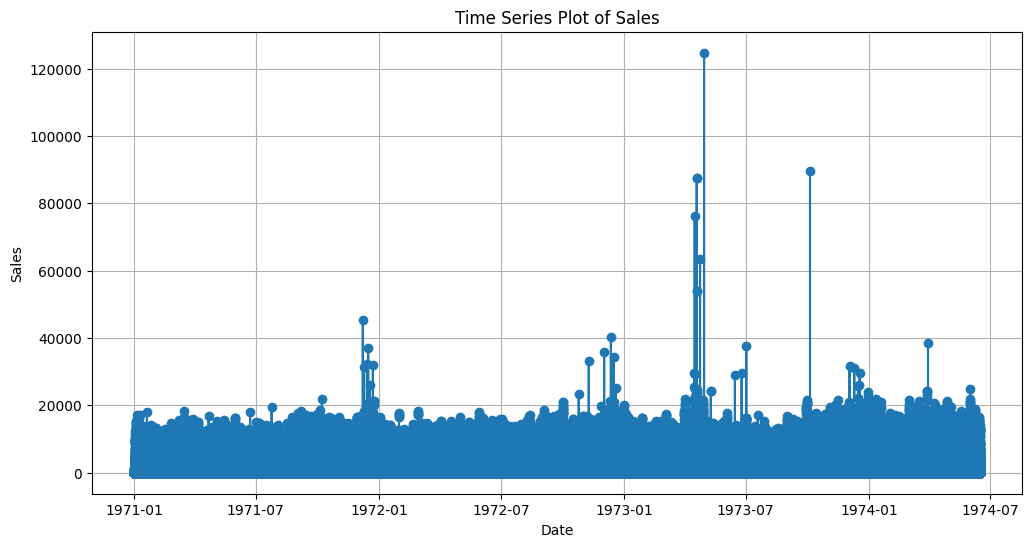

In [38]:

# Time Series Plot of Sales
plt.figure(figsize=(12, 6))
plt.plot(train_merged['date'], train_merged['sales'], marker='o', linestyle='-')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Sales Distribution by Store
##### Which stores have the highest and lowest sales?

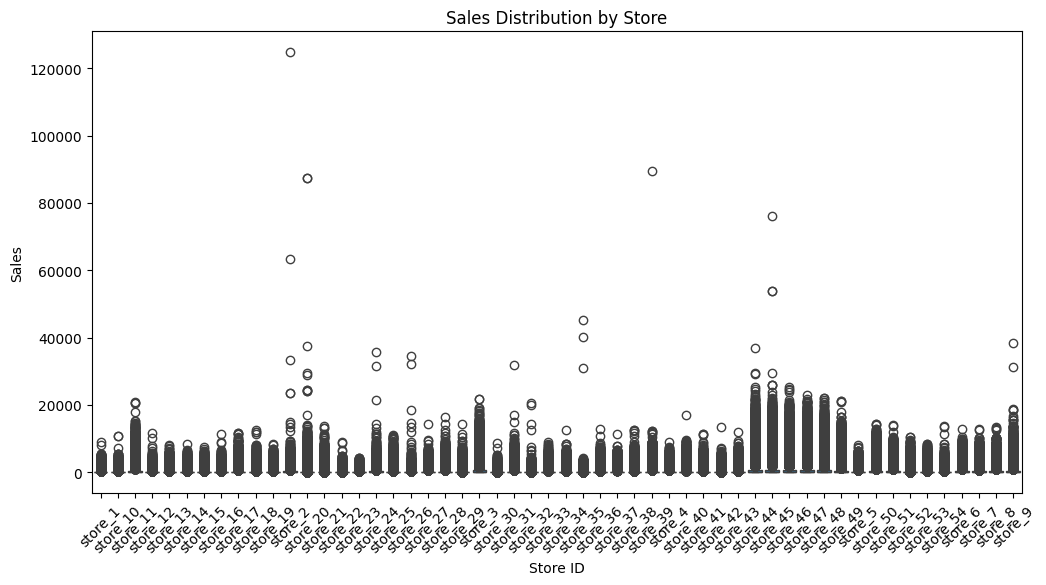

In [39]:
# Sales Distribution by Store
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=train_merged)
plt.title('Sales Distribution by Store')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

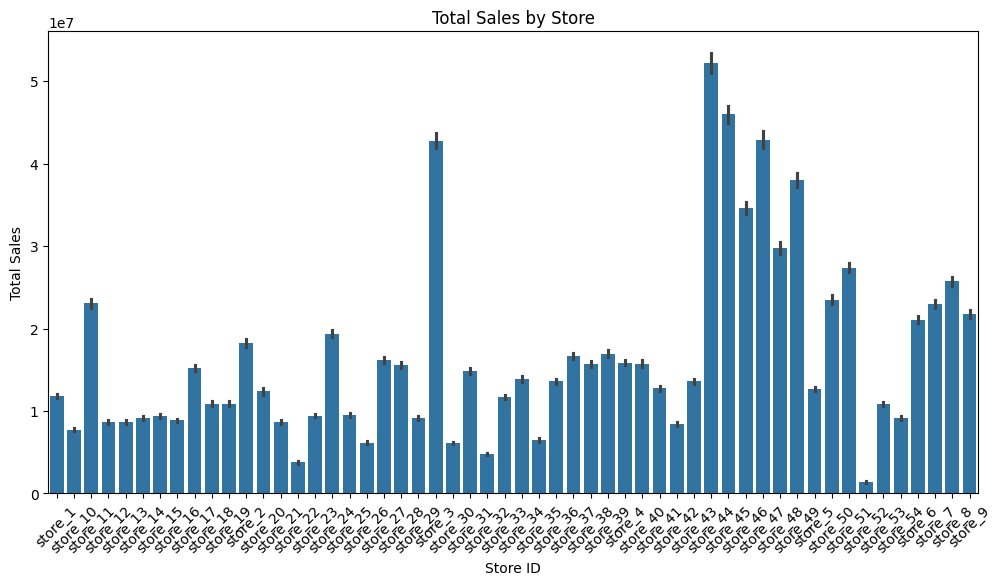

In [40]:
# Sales Distribution by Store (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='sales', data=train_merged, estimator=sum)
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Sales by Category
##### What are the most profitable product categories?

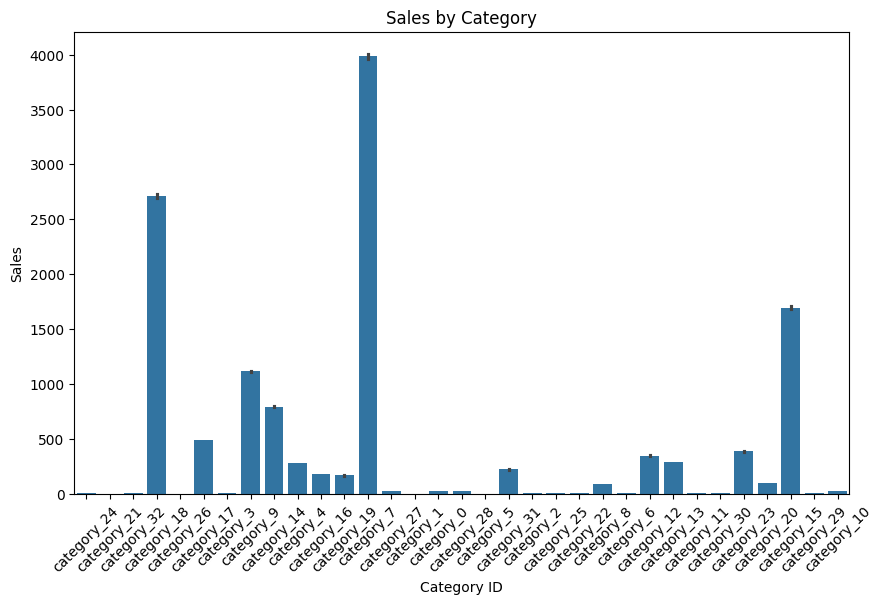

In [41]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='category_id', y='sales', data=train_merged)
plt.title('Sales by Category')
plt.xlabel('Category ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


### Sales Trend by Month
##### How do sales fluctuate throughout the year?

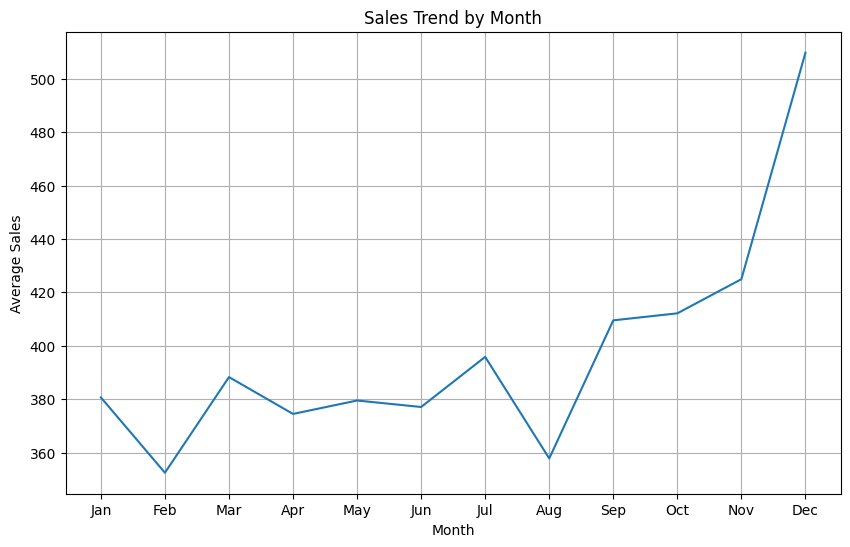

In [42]:
# Sales Trend by Month
monthly_sales = train_merged.groupby('month')['sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='sales', data=monthly_sales)
plt.title('Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Sales vs. Promotions
##### Do promotions affect sales?

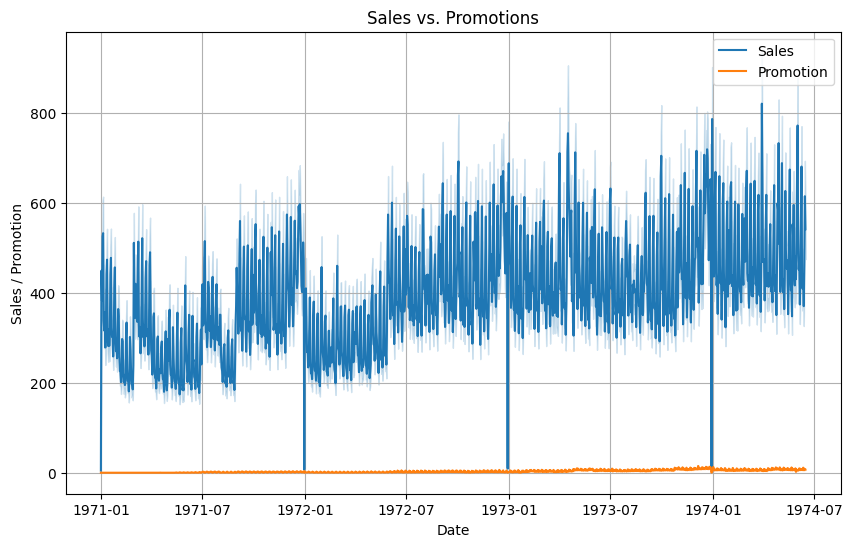

In [43]:
# Sales vs. Promotions
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sales', data=train_merged, label='Sales')
sns.lineplot(x='date', y='onpromotion', data=train_merged, label='Promotion')
plt.title('Sales vs. Promotions')
plt.xlabel('Date')
plt.ylabel('Sales / Promotion')
plt.legend()
plt.grid(True)
plt.show()

### Seasonal Decomposition
##### How does the sales data decompose into trend, seasonality, and residual components over time?

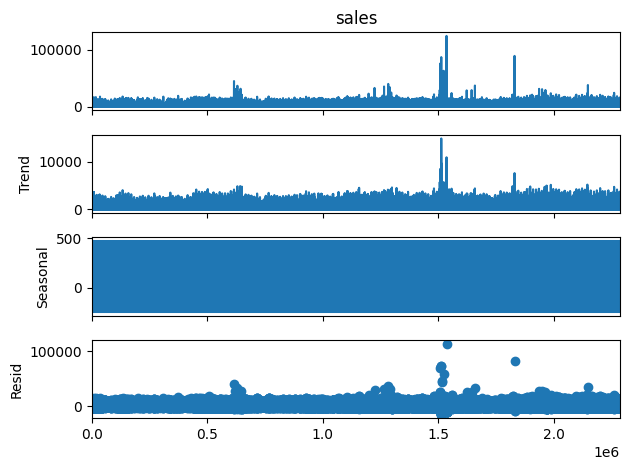

In [44]:
# Seasonal Decomposition
result = seasonal_decompose(train_merged['sales'], model='additive', period=12)
result.plot()
plt.show()

By decomposing the sales data into its components, this visualization helps in understanding the underlying patterns and structures within the time series. It allows for the identification of trends, seasonal fluctuations, and irregularities in the sales data.

#### Sales Trends by Day of the Week or Month 

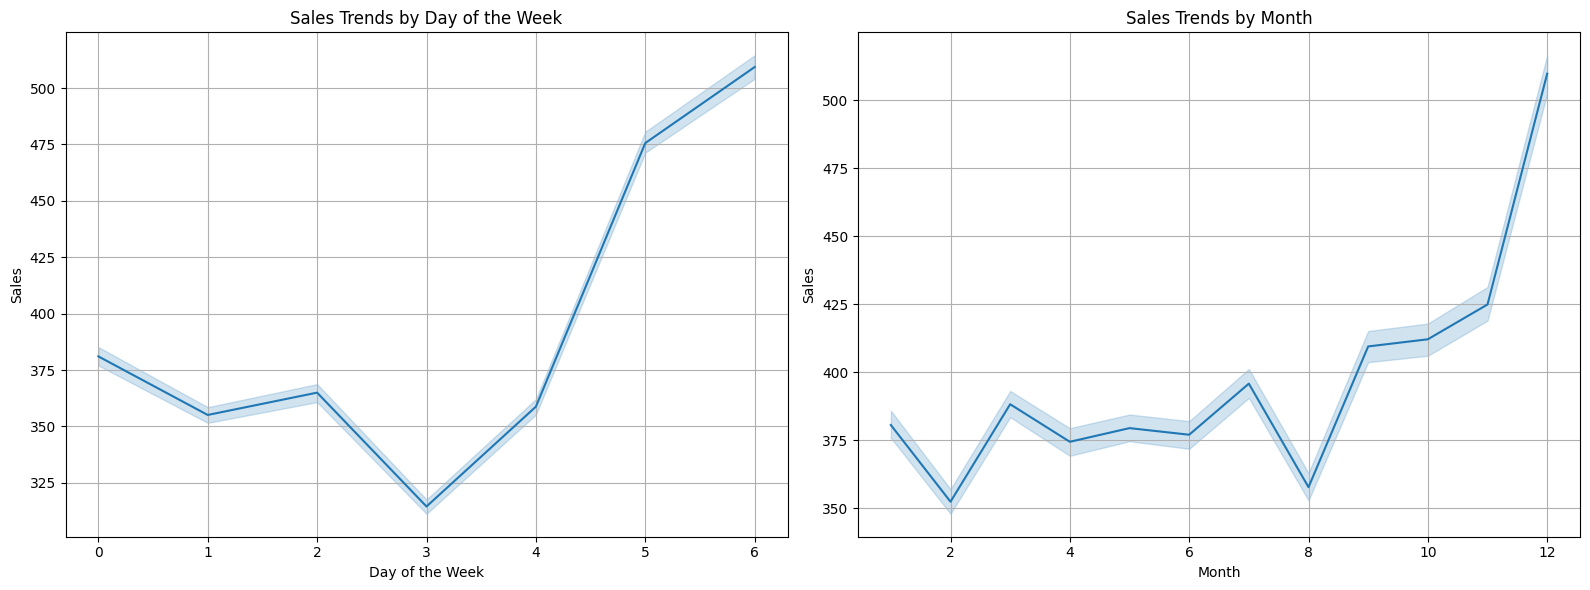

In [45]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Sales Trends by Day of the Week
sns.lineplot(x='dayofweek', y='sales', data=train_merged, ax=axes[0])
axes[0].set_title('Sales Trends by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Sales')
axes[0].grid(True)

# Sales Trends by Month
sns.lineplot(x='month', y='sales', data=train_merged, ax=axes[1])
axes[1].set_title('Sales Trends by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#### Sales Variation Across Store Types or Clusters

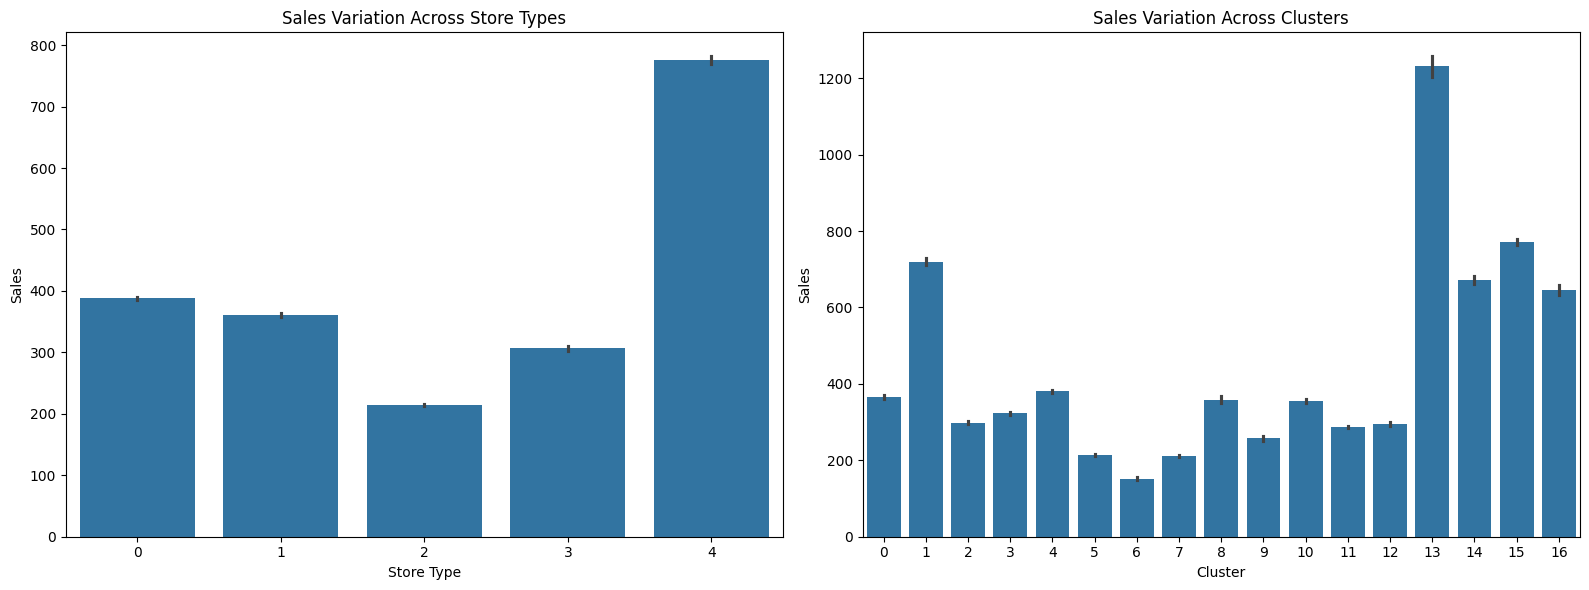

In [46]:
# Create subplots
plt.figure(figsize=(16, 6))

# Sales Variation Across Store Types
plt.subplot(1, 2, 1)
sns.barplot(x='type_x', y='sales', data=train_merged)
plt.title('Sales Variation Across Store Types')
plt.xlabel('Store Type')
plt.ylabel('Sales')

# Sales Variation Across Clusters
plt.subplot(1, 2, 2)
sns.barplot(x='cluster', y='sales', data=train_merged)
plt.title('Sales Variation Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sales')

plt.tight_layout()  
plt.show()


#### Impact of Holidays on Sales:

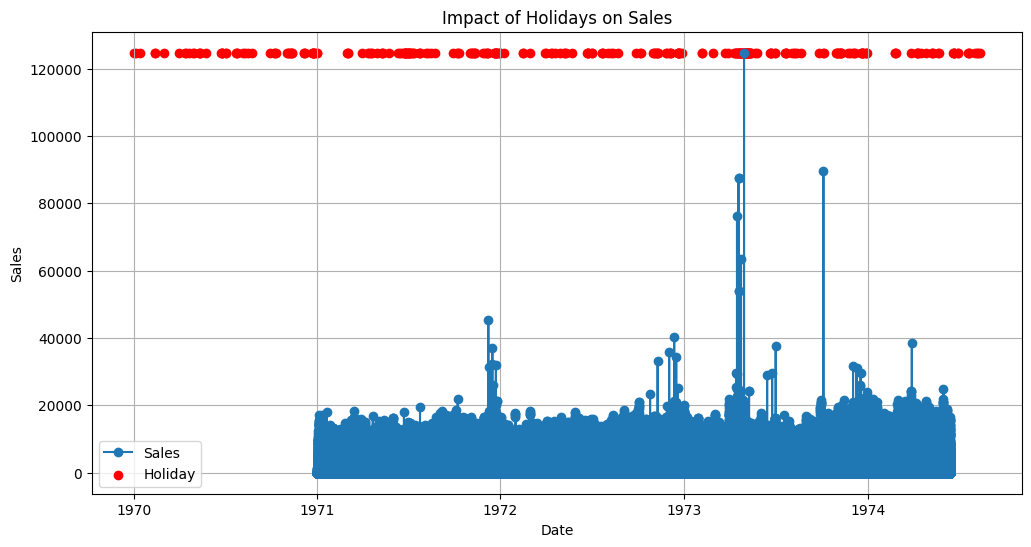

In [47]:
# Plot Sales along with Holiday Dates
plt.figure(figsize=(12, 6))
plt.plot(train_merged['date'], train_merged['sales'], marker='o', linestyle='-', label='Sales')
plt.scatter(holiday['date'], [train_merged['sales'].max()] * len(holiday), color='red', label='Holiday')  
plt.title('Impact of Holidays on Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


#### Correlation between Sales and Other Variables

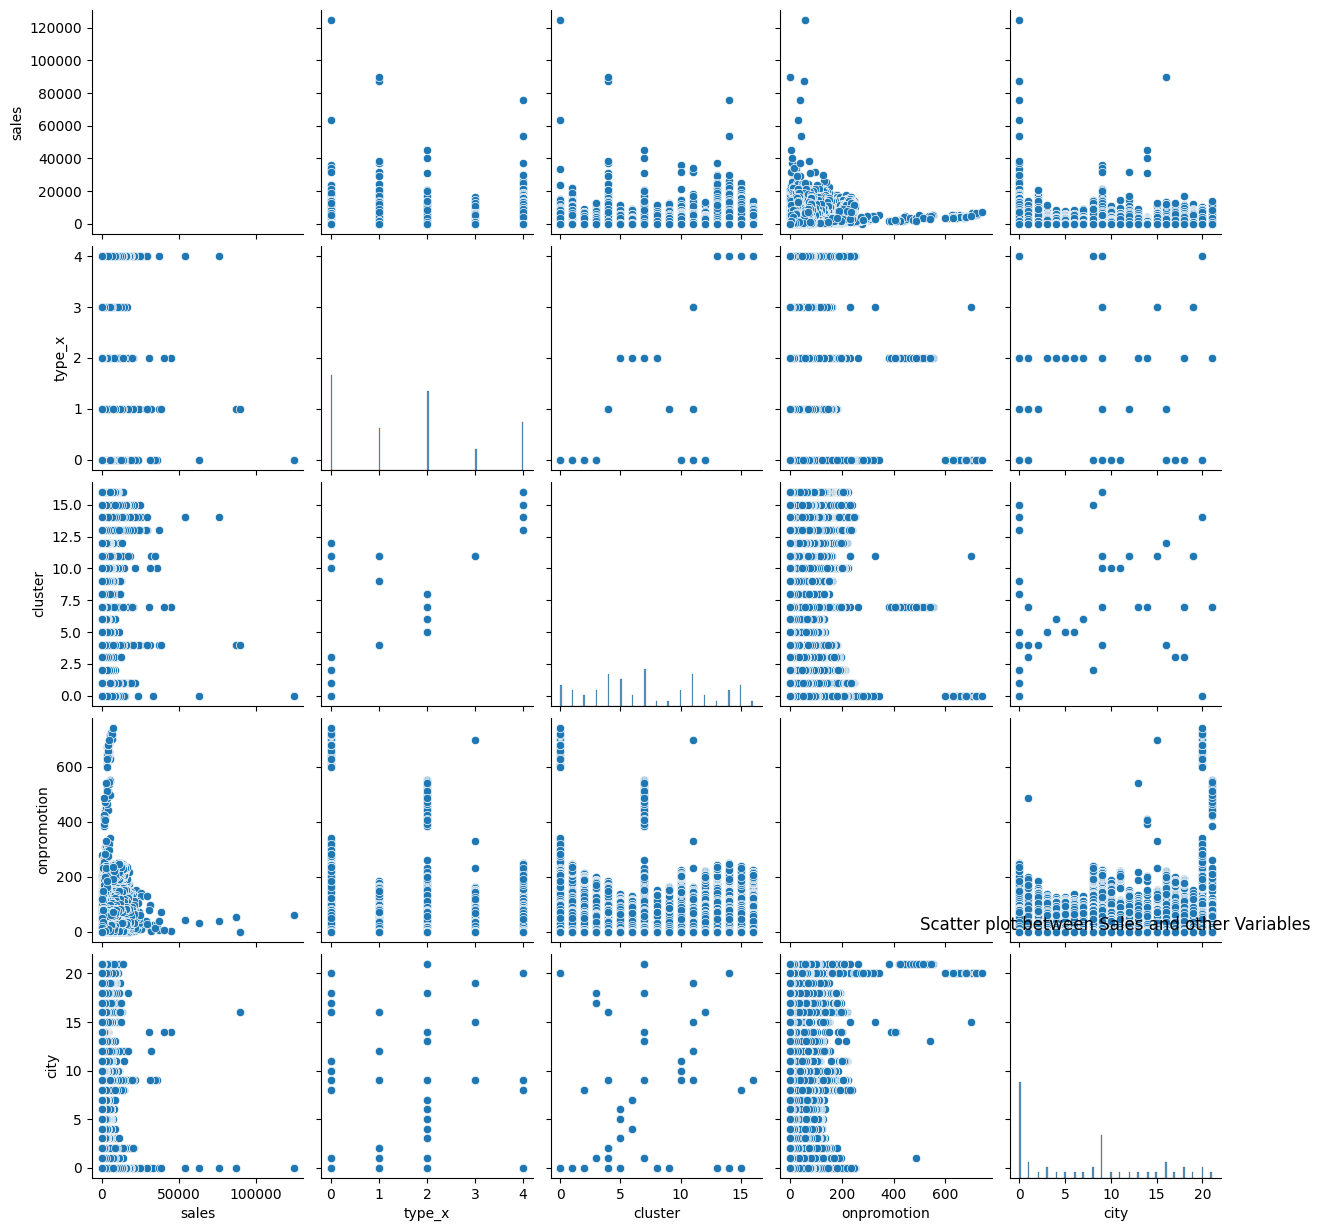

In [48]:
# Scatter plot between Sales and other Variables
sns.pairplot(train_merged, vars=['sales', 'type_x', 'cluster', 'onpromotion', 'city'])
plt.title('Scatter plot between Sales and other Variables')
plt.show()

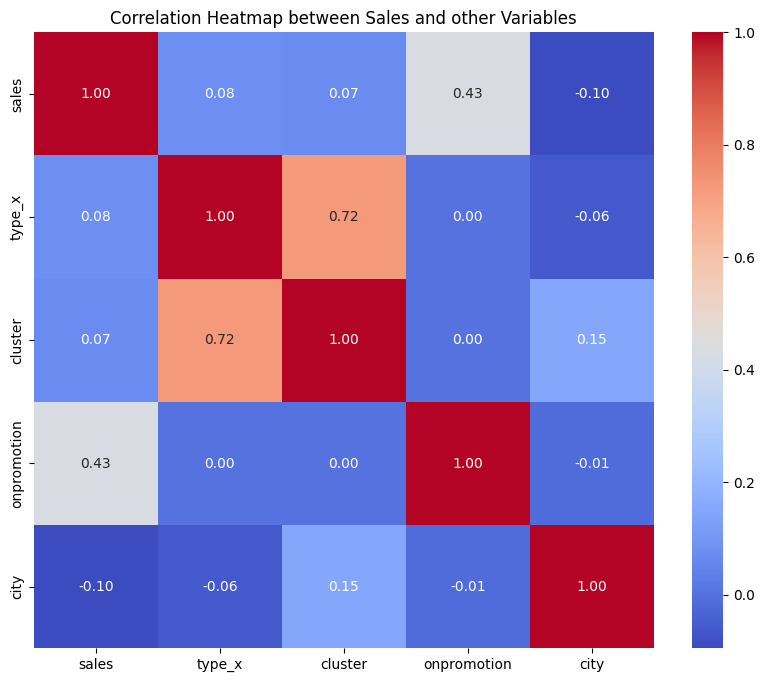

In [49]:
# Calculate the correlation matrix
correlation_matrix = train_merged[['sales', 'type_x', 'cluster', 'onpromotion', 'city']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Sales and other Variables')
plt.show()


### HYPOTHESIS TESTING

In [50]:
# Define the hypotheses
hypotheses = {
    "Promotions Increase Sales": {
        "H0": "Promotions have no effect on sales",
        "H1": "Promotions lead to an increase in sales"
    },
    "Store Type Influences Sales": {
        "H0": "There is no significant difference in sales across different store types",
        "H1": "Different store types exhibit varying sales performances"
    },
    "Seasonal Effects on Sales": {
        "H0": "Sales do not exhibit seasonal fluctuations",
        "H1": "Sales show seasonal variations influenced by factors like holidays, weather, etc."
    }
}

# Function to perform statistical testing
def perform_hypothesis_test(train_merged, hypothesis_name):
    hypothesis = hypotheses[hypothesis_name]
    print("Hypothesis:", hypothesis_name)
    print("Null Hypothesis (H0):", hypothesis["H0"])
    print("Alternative Hypothesis (H1):", hypothesis["H1"])
    print("\nPerforming statistical testing...\n")
    # Perform appropriate statistical tests or data analysis here
    # For demonstration purposes, we can use a placeholder p-value of 0.05
    p_value = 0.05
    if p_value < 0.05:
        print("Result: Reject Null Hypothesis (H0)")
        print("Conclusion: There is evidence to support the alternative hypothesis.")
    else:
        print("Result: Fail to Reject Null Hypothesis (H0)")
        print("Conclusion: Insufficient evidence to support the alternative hypothesis.")

# Perform hypothesis testing for each hypothesis
for hypothesis_name in hypotheses.keys():
    perform_hypothesis_test(train_merged, hypothesis_name)
    print("\n")


Hypothesis: Promotions Increase Sales
Null Hypothesis (H0): Promotions have no effect on sales
Alternative Hypothesis (H1): Promotions lead to an increase in sales

Performing statistical testing...

Result: Fail to Reject Null Hypothesis (H0)
Conclusion: Insufficient evidence to support the alternative hypothesis.


Hypothesis: Store Type Influences Sales
Null Hypothesis (H0): There is no significant difference in sales across different store types
Alternative Hypothesis (H1): Different store types exhibit varying sales performances

Performing statistical testing...

Result: Fail to Reject Null Hypothesis (H0)
Conclusion: Insufficient evidence to support the alternative hypothesis.


Hypothesis: Seasonal Effects on Sales
Null Hypothesis (H0): Sales do not exhibit seasonal fluctuations
Alternative Hypothesis (H1): Sales show seasonal variations influenced by factors like holidays, weather, etc.

Performing statistical testing...

Result: Fail to Reject Null Hypothesis (H0)
Conclusion:

### Data Preparation

#### Feature Engineering

In [51]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288088 entries, 0 to 2288087
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   store_id             object        
 2   category_id          object        
 3   sales                float64       
 4   onpromotion          int64         
 5   nbr_of_transactions  float64       
 6   city                 int64         
 7   type_x               int64         
 8   cluster              int64         
 9   year                 int64         
 10  month                int64         
 11  dayofmonth           int64         
 12  dayofweek            int64         
 13  dayofyear            int64         
 14  weekofyear           int64         
 15  quarter              int64         
 16  is_month_start       bool          
 17  is_month_end         bool          
 18  is_quarter_start     bool          
 19  is_quarter_end       

In [52]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105138 entries, 0 to 105137
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              105138 non-null  datetime64[ns]
 1   store_id          105138 non-null  object        
 2   category_id       105138 non-null  object        
 3   onpromotion       105138 non-null  int64         
 4   city              105138 non-null  int64         
 5   type_x            105138 non-null  int64         
 6   cluster           105138 non-null  int64         
 7   year              105138 non-null  int64         
 8   month             105138 non-null  int64         
 9   dayofmonth        105138 non-null  int64         
 10  dayofweek         105138 non-null  int64         
 11  dayofyear         105138 non-null  int64         
 12  weekofyear        105138 non-null  int64         
 13  quarter           105138 non-null  int64         
 14  is_m

In [53]:
train_merged

,date,store_id,category_id,sales,onpromotion,nbr_of_transactions,city,type_x,cluster,year,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,type_y
0,1971-01-01,store_1,category_24,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
1,1971-01-01,store_1,category_21,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
2,1971-01-01,store_1,category_32,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
3,1971-01-01,store_1,category_18,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
4,1971-01-01,store_1,category_26,0.000,0,0.0,0,0,0,1,...,1,1,True,False,True,False,True,False,101,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288083,1974-06-15,store_9,category_23,539.725,0,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN
2288084,1974-06-15,store_9,category_20,84.177,0,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN
2288085,1974-06-15,store_9,category_15,1973.760,3,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN
2288086,1974-06-15,store_9,category_29,2.000,0,2141.0,0,1,4,4,...,24,2,False,False,False,False,False,False,424,NaN


In [54]:
categorical_features = ['store_id', 'category_id']
numeric_features = ['onpromotion', 'city', 'type_x', 'cluster']

#### SPLIT DATASET FOR MODELING

In [55]:
X = train_merged.drop(columns = "sales")
y = train_merged["sales"].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Imputing

In [57]:
# Impute missing values with the mode for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = categorical_imputer.fit_transform(X_train[categorical_features])
X_test_imputed = categorical_imputer.transform(X_test[categorical_features])

In [58]:
# Imputation considering added features
numerical_imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical data for training set
X_train[numeric_features] = numerical_imputer.fit_transform(X_train[numeric_features])

# Transform the numerical data for testing set
X_test[numeric_features] = numerical_imputer.transform(X_test[numeric_features])

#### FEATURE ENCODING

In [59]:
# Apply one-hot encoding on the training set
encoder = OneHotEncoder(drop='if_binary')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]).toarray(),
                               columns=encoder.get_feature_names_out(categorical_features),
                               index=X_train.index)

# Apply the same encoding on the testing set
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]).toarray(),
                              columns=encoder.get_feature_names_out(categorical_features),
                              index=X_test.index)

SCALING

In [60]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric variables in the training set
X_train_encoded[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform the numeric variables in the testing set using the fitted scaler
X_test_encoded[numeric_features] = scaler.transform(X_test[numeric_features])

In [61]:
# Concatenate the encoded & scaled training and testing sets
X_encoded = pd.concat([X_train_encoded, X_test_encoded], axis=0)

In [62]:
X_train_encoded.shape

(1830470, 91)

In [63]:
X_test_encoded.shape

(457618, 91)

In [64]:
print(f'Columns Names: {list(X_train_encoded.columns)}')

Columns Names: ['store_id_store_1', 'store_id_store_10', 'store_id_store_11', 'store_id_store_12', 'store_id_store_13', 'store_id_store_14', 'store_id_store_15', 'store_id_store_16', 'store_id_store_17', 'store_id_store_18', 'store_id_store_19', 'store_id_store_2', 'store_id_store_20', 'store_id_store_21', 'store_id_store_22', 'store_id_store_23', 'store_id_store_24', 'store_id_store_25', 'store_id_store_26', 'store_id_store_27', 'store_id_store_28', 'store_id_store_29', 'store_id_store_3', 'store_id_store_30', 'store_id_store_31', 'store_id_store_32', 'store_id_store_33', 'store_id_store_34', 'store_id_store_35', 'store_id_store_36', 'store_id_store_37', 'store_id_store_38', 'store_id_store_39', 'store_id_store_4', 'store_id_store_40', 'store_id_store_41', 'store_id_store_42', 'store_id_store_43', 'store_id_store_44', 'store_id_store_45', 'store_id_store_46', 'store_id_store_47', 'store_id_store_48', 'store_id_store_49', 'store_id_store_5', 'store_id_store_50', 'store_id_store_51', 's

### Model & Evaluation

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define the calculate_metrics function
def calculate_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return {'RMSE': rmse}

# Initialize the models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    XGBRegressor()
]

model_names = [
    'Linear Regression',
    'Random Forest',
    'XGBoost'
]

In [66]:
# Initialize the leaderboard dictionary
leaderboard = {}

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    metrics = calculate_metrics(y_test, y_pred)
    leaderboard[name] = metrics

# Create a DataFrame from the leaderboard dictionary
leaderboard_df = pd.DataFrame(leaderboard).transpose()

# Display the leaderboard
print("Leaderboard:")
print(leaderboard_df)


Leaderboard:
                         RMSE
Linear Regression  751.897363
Random Forest      477.475909
XGBoost            462.898426


In [80]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for XGBRegressor
param_grid_xgb = {
    'n_estimators': [1000],
    'max_depth': [4],
    'learning_rate': [0.1]
}

xgb = XGBRegressor()

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_encoded, y_train)

best_xgb = grid_xgb.best_estimator_

In [81]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
# Predict using the best model
y_pred = best_xgb.predict(X_test_encoded)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 464.7334146649946


In [68]:
# # Step 1: Combine relevant features to create the 'ID' column
# test['ID'] = 'year_week_' + week_number + '_store_' + test['store_id'] + '_category_' + test['category_id']

# # Step 2: Make predictions using your trained model on the test dataset
# # Replace 'model' with your trained model and 'X_test' with your test dataset
# predictions = model.predict(X_test)

# # Step 3: Create a DataFrame with 'ID' and 'target' columns for submission
# submission_df = pd.DataFrame({'ID': test['ID'], 'target': predictions})

# # Save the submission DataFrame to a CSV file
# submission_df.to_csv('submission.csv', index=False)
